In [1]:
from radiosunpy.time import TimeRange 
from radiosunpy.client import RATANClient
from radiosunpy.visualization import plot_ratan_fits_data

from astropy.io.fits.verify import VerifyWarning
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore', category=VerifyWarning)

/opt/homebrew/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


## Visualizing RATAN-600 data
In `radiosunpy` package a canonically accurate way to visualize RATAN-600 data was implemented and this notebooks provides some examples of method usage

There are some options that can be choosed: 
    
    - make a plot file that either exists localy or had already been parsed with other `radiosunpy` methods or using the url-link to this file
    - make a plot of calibrated data or raw one (if you plot with existing fits the flag won't work)
    - plot Intensity mode (I), Polarization mode (V) or both (default option)

In [2]:
ratan_client = RATANClient()
timerange = TimeRange('2017-09-03', '2017-09-03')
url = ratan_client.acquire_data(timerange)[0]
print(url)

http://spbf.sao.ru/data/ratan/2017/09/20170903_121257_sun+0_out.fits


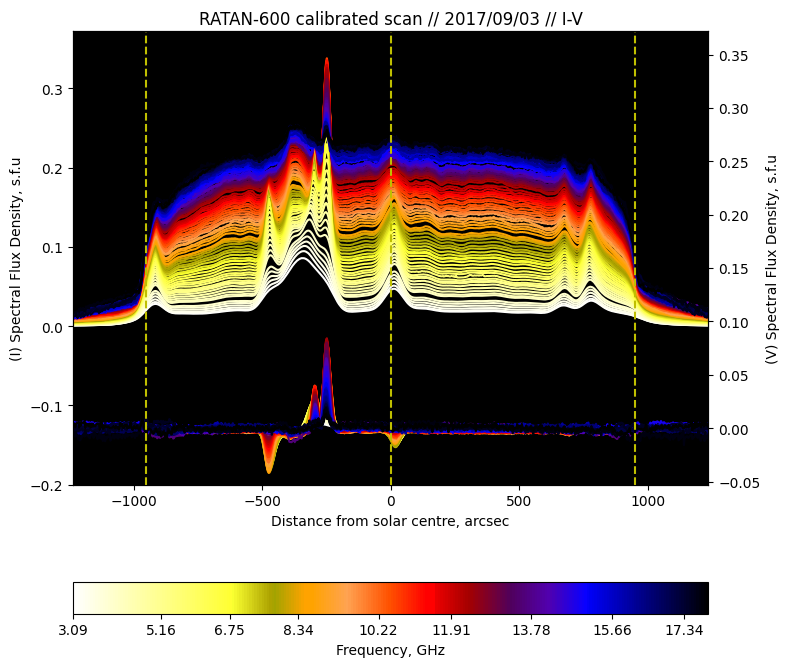

In [3]:
"""
As you can see, we can pass the url to the scan on RATAN-600 web archieve 
and plot calibrated scan with just one line of code
"""
plot_ratan_fits_data(url, is_calibrated=True)

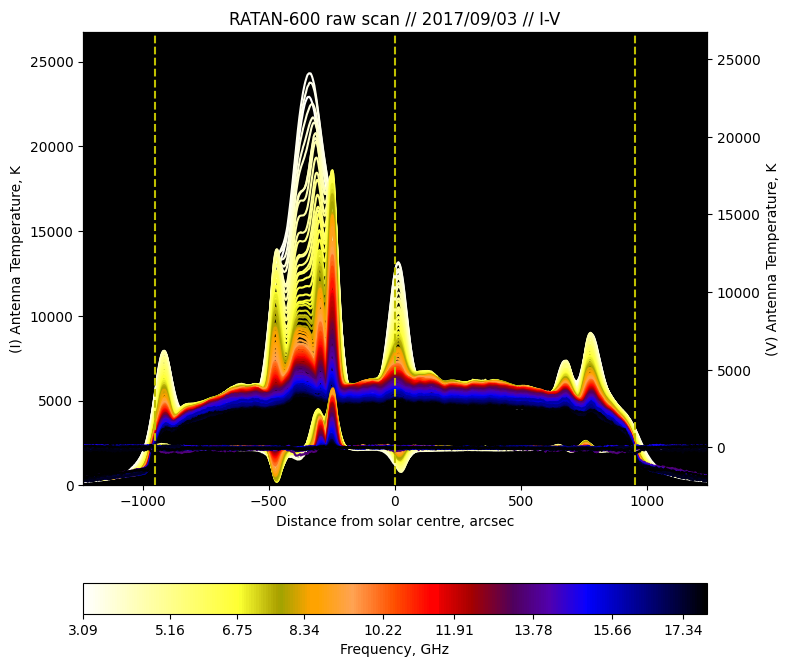

In [4]:
"""
If we dont provide `is_calibrated` flag, the method will plot raw data 
"""
plot_ratan_fits_data(url)

In [5]:
""" 
Let's used parsed file now to plot data. 
Now, `is_calibrated` flag is useless and plot result will 
depend on what you provided as a fits file - raw data or proccessed one
"""
raw, processed = ratan_client.process_fits_data(
    url,
    save_path=None,
    save_with_original=False
)

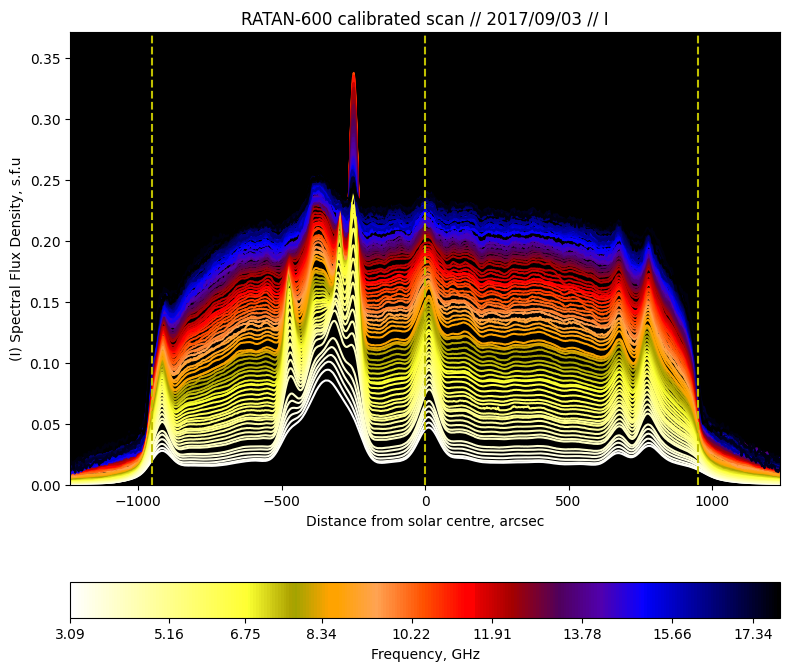

In [6]:
"""
We can also specify what mode we want to visualize: I, V or both ('both' is default option)  
"""
plot_ratan_fits_data(processed, plot_V=False)

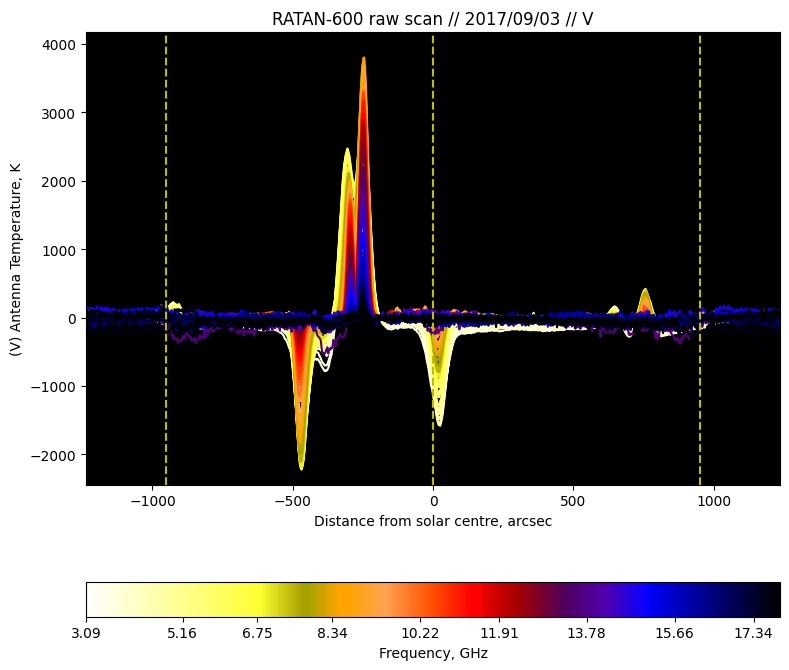

In [9]:
plot_ratan_fits_data(raw, plot_I=False)